<h1 style = 'color:darkslateblue'>Importing the libraries</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style = 'color:darkslateblue'>Reading the csv file or the dataset</h1>

In [24]:
colmns = ['ID','Topic','Sentiment','Tweet']
df_sentiment = pd.read_csv("twitter_training.csv",header=None,names = colmns)
df_sentiment.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


<h1 style='color:darkslateblue'>Data Exploration</h1>

In [14]:
df_sentiment.shape

(74681, 4)

In [29]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [35]:
df_sentiment = df_sentiment.drop_duplicates()

In [39]:
df_sentiment.shape

(71982, 4)

In [43]:
df_sentiment.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [47]:
df_sentiment['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [68]:
df_sentiment['Topic'].nunique()

32

<h1 style='color:darkslateblue'>EDA</h1>

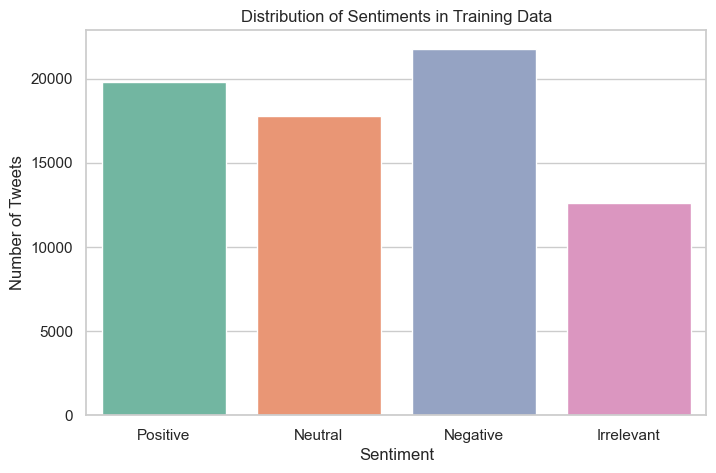

In [75]:
# Set the visual style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(8, 5))

# Create a count plot for the sentiment column (column 2)
sns.countplot(x=df_sentiment['Sentiment'], palette='Set2',hue = df_sentiment['Sentiment'],legend=False)

# Add titles and labels
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()

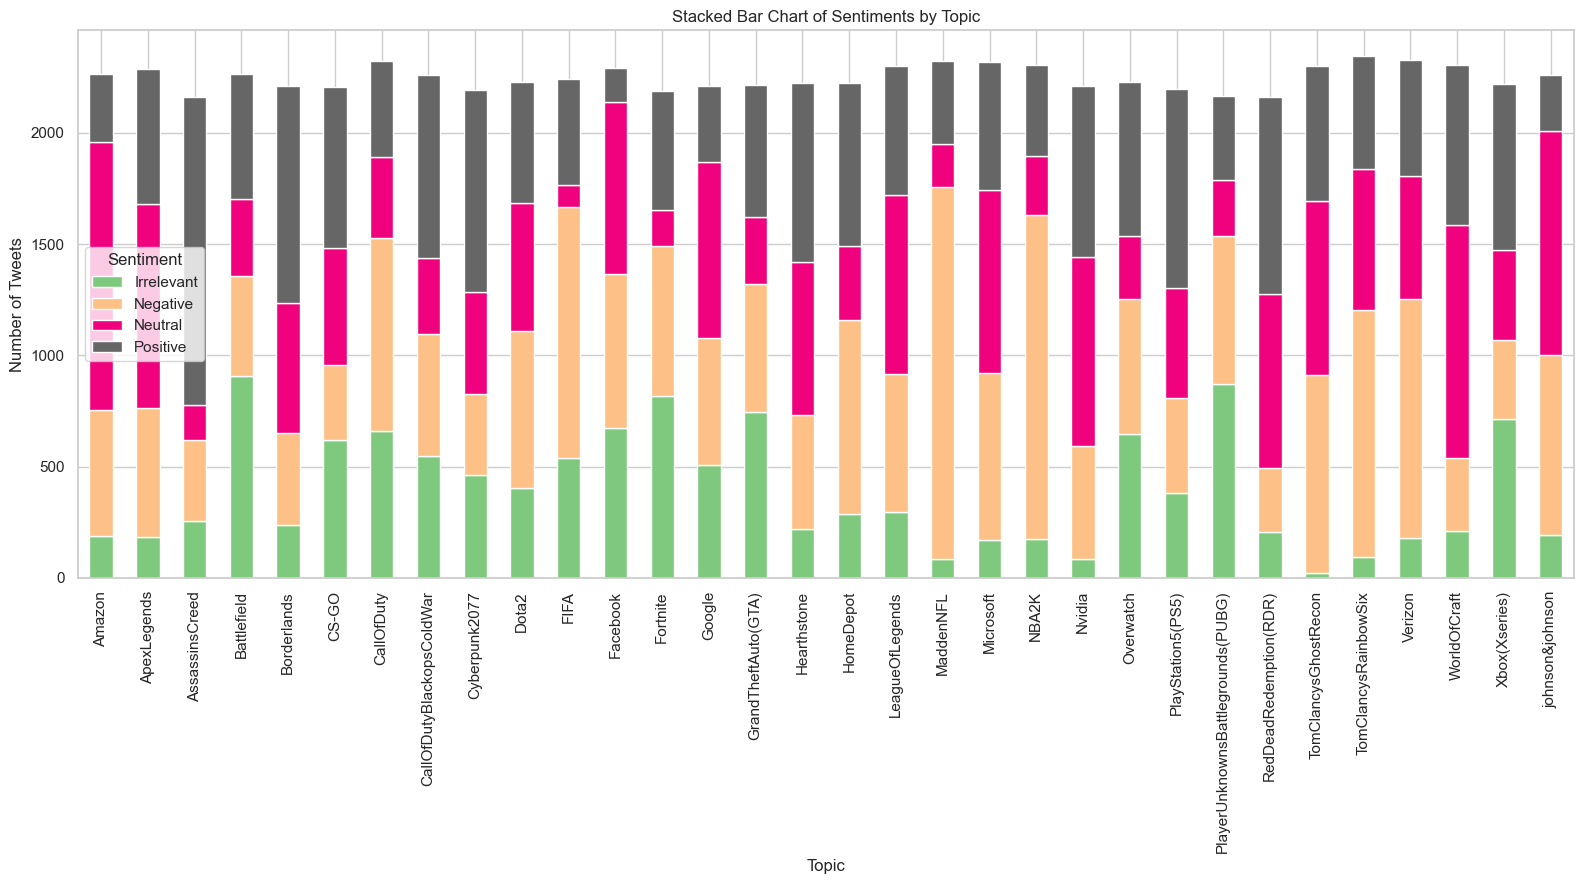

In [85]:
sentiment_counts = df_sentiment.groupby(['Topic','Sentiment']).size().unstack(fill_value=0)

# Plot stacked bar chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(16, 9), colormap='Accent')
plt.title('Stacked Bar Chart of Sentiments by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

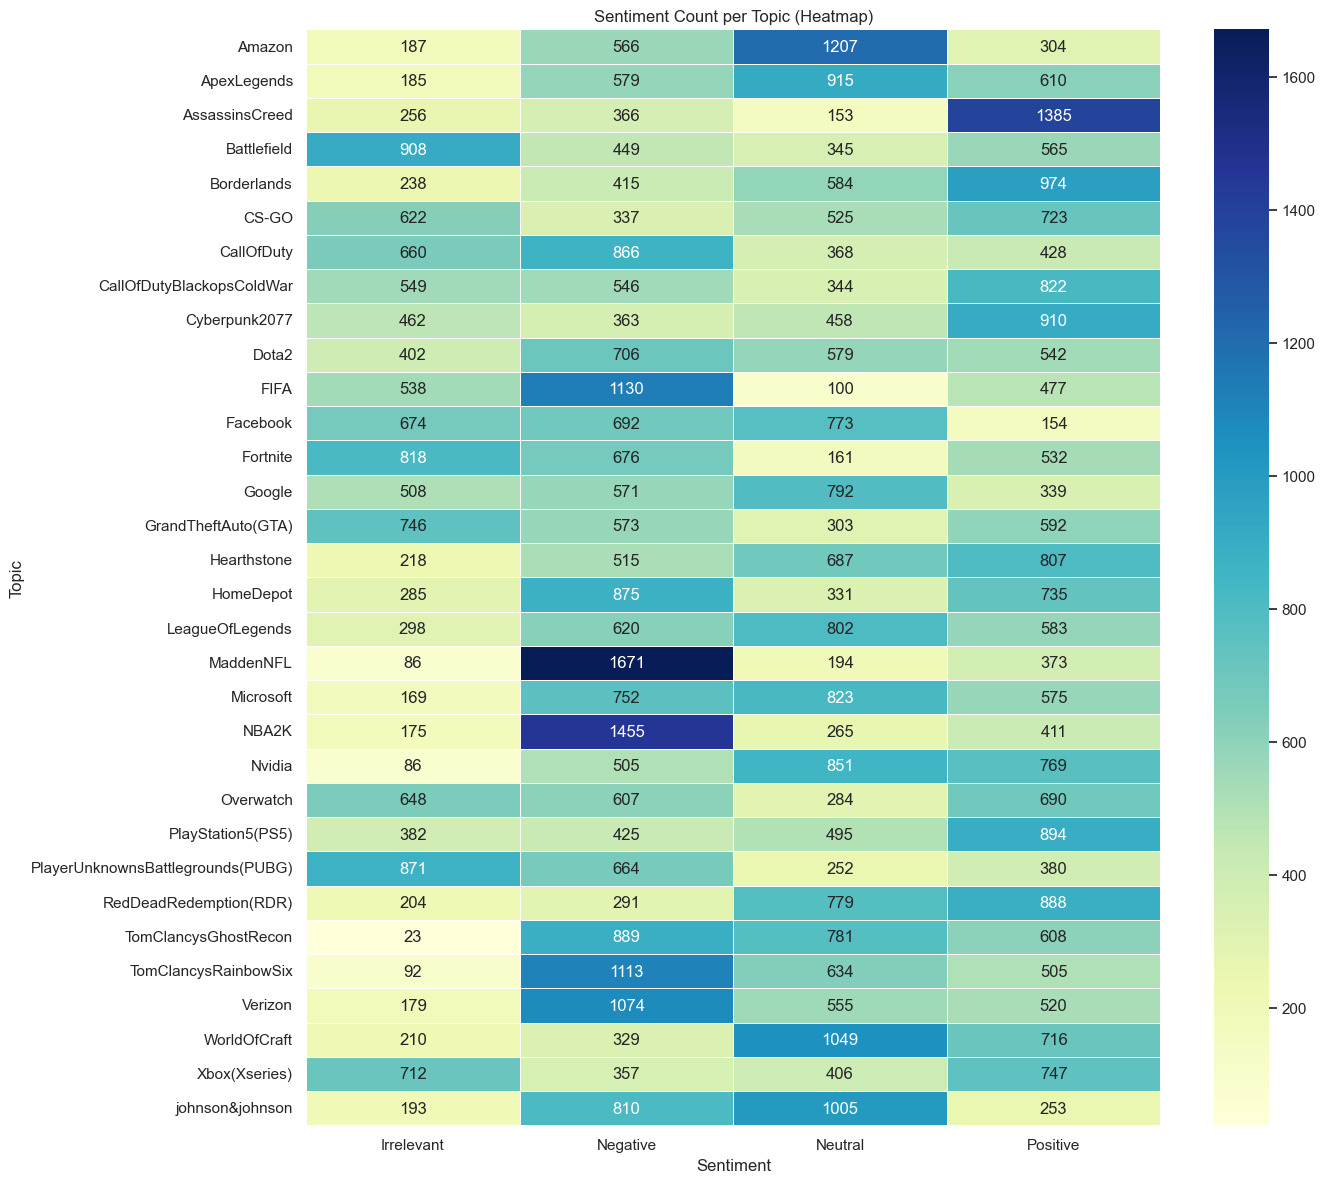

In [87]:
pivot_table = df_sentiment.pivot_table(index='Topic', columns='Sentiment', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Sentiment Count per Topic (Heatmap)")
plt.xlabel("Sentiment")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

<h1 style = 'color:darkslateblue'>public opinion and attitudes towards
specific topics or brands</h1>

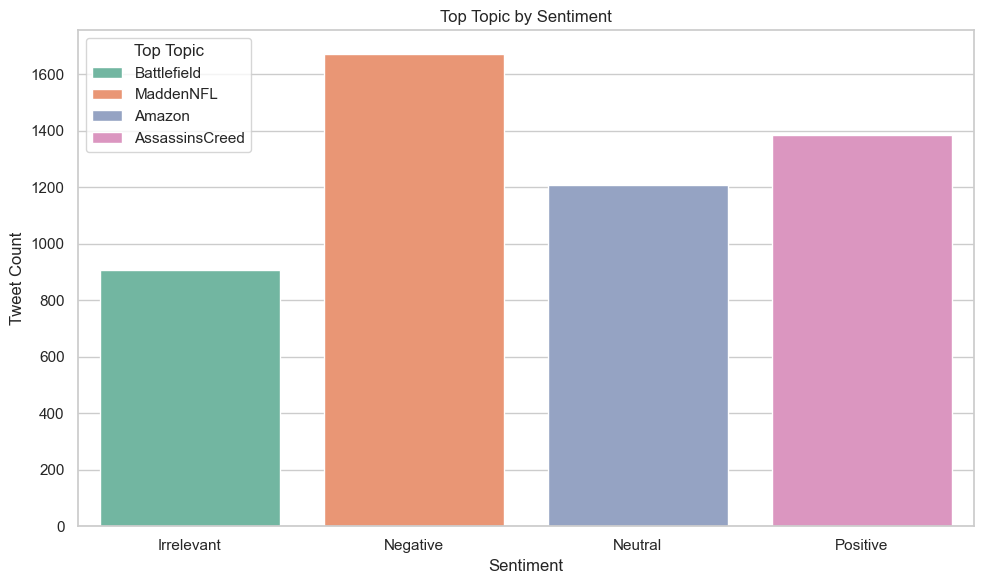

In [94]:
# Group by sentiment and topic, then count the occurrences
sentiment_topic_counts = df_sentiment.groupby(["Sentiment", "Topic"]).size().reset_index(name="count")

# Get the topic with the highest count for each sentiment
top_topics = sentiment_topic_counts.loc[sentiment_topic_counts.groupby("Sentiment")["count"].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_topics, x="Sentiment", y="count", hue="Topic", dodge=False, palette="Set2")

# Titles and labels
plt.title("Top Topic by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.legend(title="Top Topic")
plt.tight_layout()
plt.show()